In [1]:
from mykalshi import session, transport, formatting, market, events, trading
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

In [9]:
import pandas as pd
markets_data = market.get_all_markets()
markets_df = pd.json_normalize(markets_data)

markets_df

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Date,custom_strike.Expo_Date,custom_strike.Interest Rate
0,KXTRUMPPARDON-26JAN01-YTHU,KXTRUMPPARDON-26JAN01,binary,"Who will President Trump pardon before Jan 1, ...",,Young Thug,Young Thug,2025-05-09T14:00:00Z,2026-01-01T15:00:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KXTRUMPPARDON-26JAN01-SBAN,KXTRUMPPARDON-26JAN01,binary,"Who will President Trump pardon before Jan 1, ...",,Steve Bannon,Steve Bannon,2025-05-09T14:00:00Z,2026-01-01T15:00:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KXTRUMPPARDON-26JAN01-RVER,KXTRUMPPARDON-26JAN01,binary,"Who will President Trump pardon before Jan 1, ...",,Roger Ver,Roger Ver,2025-05-09T14:00:00Z,2026-01-01T15:00:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KXTRUMPPARDON-26JAN01-RGIU,KXTRUMPPARDON-26JAN01,binary,"Who will President Trump pardon before Jan 1, ...",,Rudy Giuliani,Rudy Giuliani,2025-05-09T14:00:00Z,2026-01-01T15:00:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KXTRUMPPARDON-26JAN01-KDSG,KXTRUMPPARDON-26JAN01,binary,"Who will President Trump pardon before Jan 1, ...",:: aka NBA YoungBoy,Kentrell DeSean Gaulden,Kentrell DeSean Gaulden,2025-05-09T14:00:00Z,2026-01-01T15:00:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515094,TEMP-21-T2.124,TEMP-21,binary,Will 2021 be the **hottest year on record**?,,Above 2.124° C,2.124° C or below,2021-07-02T14:00:00Z,2022-01-10T00:00:00Z,2021-07-02T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515095,HOME-21JUN-T750,HOME-21JUN,binary,"Will new U.S. home sales be above 750,000?",>750K,"Above 750,000","750,000 or below",2021-06-30T14:00:00Z,2021-07-25T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515096,GDP-21JUN30-T6.0,GDP-21JUN30,binary,Will real GDP increase by more than 6%?,>6%,Above 6%,6% or below,2021-06-30T14:00:00Z,2021-07-28T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515097,TRDDEFCN-21MAY-T30,TRDDEFCN-21MAY,binary,Will the US trade deficit in goods with China ...,>$30bn,Above $30 billion,$30 billion or below,2021-06-30T14:00:00Z,2021-07-01T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=markets_df, x='volume', bins=100, kde=False, stat='proportion')
plt.title('Distribution of Finalized Liquid Markets by Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [ ]:
fin_liquid_markets = markets_df[(markets_df['status'] == "finalized") & (markets_df['volume'] > 500000)]
fin_liquid_markets = fin_liquid_markets.reset_index(drop=True)
# fin_liquid_markets.to_csv("FinalizedLiquidMarkets.csv", index=False)
fin_liquid_markets

In [34]:
out = events.event_info("PRES-2024")
out["markets"]#, out["event_info"]

,market_ticker,yes_sub_title,range,strike_type,last_price,yes_bid,yes_ask,no_bid,no_ask,volume,open_time,close_time,status,rules_primary
0,PRES-2024-KH,Kamala Harris,:: or another Democrat,custom,1,0,1,99,100,273312857,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Kamala Harris or another representative of ...
1,PRES-2024-DJT,Donald Trump,:: or another Republican,None,99,99,100,0,1,262334207,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Donald Trump or another representative of t...
2,PRES-2024-RFK,Robert F. Kennedy Jr.,:: or another We the People nominee,custom,1,0,1,99,100,224361,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Robert F. Kennedy Jr. or another representa...
3,PRES-2024-JS,Jill Stein,:: or another Green Party nominee,custom,1,0,1,99,100,40394,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Jill Stein or another representative of the...
4,PRES-2024-CO,Chase Oliver,:: or another Libertarian,custom,1,0,1,99,100,20834,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Chase Oliver or another representative of t...
5,PRES-2024-CW,Cornel West,:: or another Justice for All nominee,custom,1,0,1,99,100,16290,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Cornel West or another representative of th...


In [7]:
results = {}

for mkt in out["markets"]["market_ticker"].values:
    cs_df = market.candlesticks_to_df(market.get_full_market(series_ticker="KXLLM1", ticker=mkt, period_interval='h', end_ts='11/10/2024'))[['end_period', 'yes_ask_close', 'yes_bid_close', 'volume']]
    
    cs_df['end_period'] = pd.to_datetime(cs_df['end_period'])
    cs_df['date'] = cs_df['end_period']
    cs_df['midval'] = (cs_df['yes_ask_close'] + cs_df['yes_bid_close']) / 2
    cs_df['ask'] = cs_df['yes_ask_close']
    cs_df['bid'] = cs_df['yes_bid_close']
    cs_df = cs_df.drop(columns=['yes_ask_close', 'yes_bid_close', 'end_period'])
    cs_df.set_index('date', inplace=True)
    title = out["markets"].loc[out["markets"]["market_ticker"] == mkt, "yes_sub_title"].values[0]
    # range = parse_range_string(range)

    results[title] = cs_df

# Step 1: Compute the global index (union of all datetime indices)
all_indices = sorted(set().union(*[df.index for df in results.values()]))
global_index = pd.DatetimeIndex(all_indices)

# Step 2: Build the full DataFrame with aligned index
results_df = pd.DataFrame(index=global_index)

# Step 3: Merge all time series, aligned on the global index
for title, df in results.items():
    df = df.groupby(df.index).mean()  # or .sum(), or use .duplicated() line

    renamed_df = df.rename(columns={
        'midval': f'{title}_midval',
        'ask': f'{title}_ask',
        'bid': f'{title}_bid',
        'volume': f'{title}_volume'
    })

    renamed_df = renamed_df.reindex(global_index)
    results_df = pd.concat([results_df, renamed_df], axis=1)

# results_df.ffill(inplace=True)
for col in results_df.columns:
    if '_midval' in col:
        vol_col = col.replace('_midval', '_volume')
        filled_series = results_df[col].copy()
        volume_series = results_df[vol_col]

        for i in range(1, len(filled_series)):
            if pd.isna(filled_series.iloc[i]) and pd.notna(volume_series.iloc[i-1]) and volume_series.iloc[i-1] > 200:
                filled_series.iloc[i] = filled_series.iloc[i - 1]

        results_df[col] = filled_series

# Step 4: Final computed columns
results_df['Vol'] = results_df[[col for col in results_df.columns if '_volume' in col]].sum(axis=1)
results_df['Tot'] = results_df[[col for col in results_df.columns if '_midval' in col]].sum(axis=1)

results_df.index.name = 'date'
results_df


,Kamala Harris_volume,Kamala Harris_midval,Kamala Harris_ask,Kamala Harris_bid,Donald Trump_volume,Donald Trump_midval,Donald Trump_ask,Donald Trump_bid,Robert F. Kennedy Jr._volume,Robert F. Kennedy Jr._midval,...,Chase Oliver_volume,Chase Oliver_midval,Chase Oliver_ask,Chase Oliver_bid,Cornel West_volume,Cornel West_midval,Cornel West_ask,Cornel West_bid,Vol,Tot
date,,,,,,,,,,,,,,,,,,,,,
2024-10-04 13:00:00,24083.0,50.5,51.0,50.0,39835.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.5,1.0,0.0,63919.0,100.5
2024-10-04 14:00:00,4330.0,50.5,51.0,50.0,3390.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7720.0,100.0
2024-10-04 15:00:00,6199.0,50.5,51.0,50.0,3382.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9581.0,100.0
2024-10-04 16:00:00,2814.0,50.5,51.0,50.0,3804.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6618.0,100.0
2024-10-04 17:00:00,8601.0,50.5,51.0,50.0,21784.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30385.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-09 20:00:00,21514.0,1.5,2.0,1.0,54705.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76219.0,99.0
2024-11-09 21:00:00,56499.0,1.5,2.0,1.0,77001.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133500.0,99.0
2024-11-09 22:00:00,94528.0,1.5,2.0,1.0,41228.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135756.0,99.0


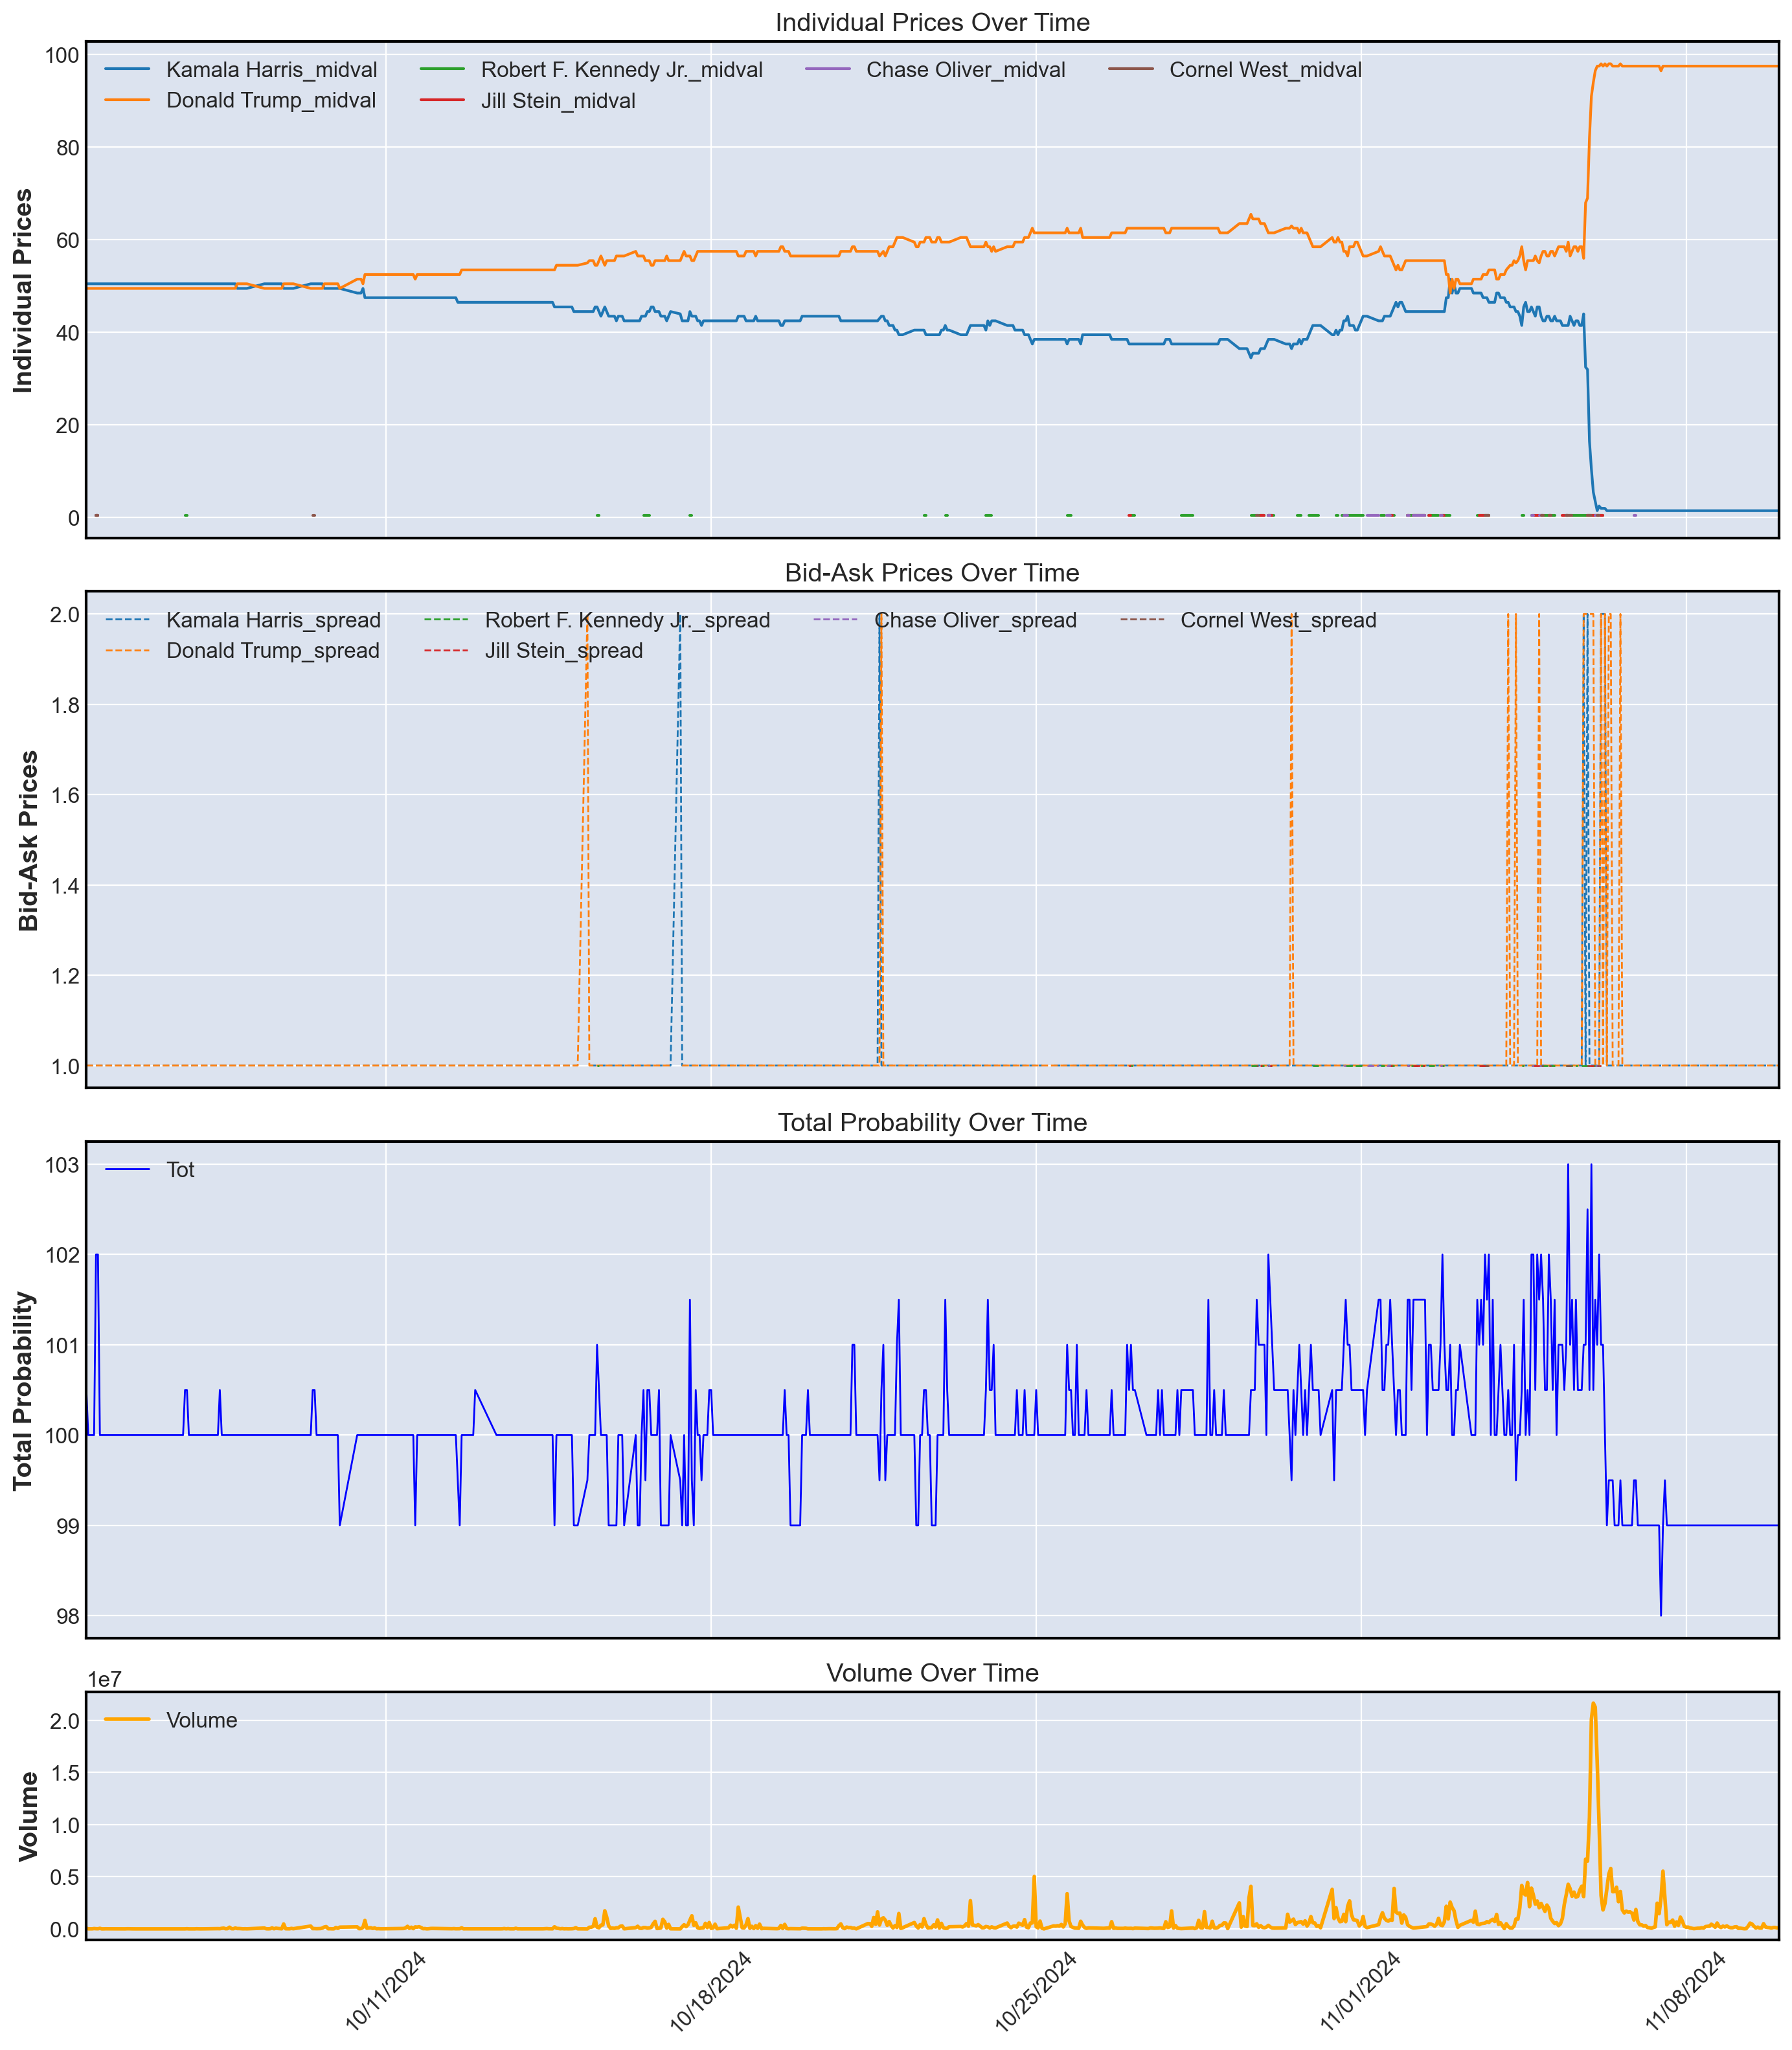

In [28]:
plot_df = results_df.reset_index()

# Identify price columns (all columns except 'date', 'Tot', and 'Vol')
price_columns = [col for col in plot_df.columns if "_midval" in col]

# Create a figure with 3 subplots, making the top two price plots the same size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(14, 16), 
                                    gridspec_kw={'height_ratios': [2, 2, 2, 1]}, 
                                    sharex=True)

# Plot 1: Individual Prices
for col in price_columns:
    ax1.plot(plot_df['date'], plot_df[col], linewidth=1.5, label=col)
ax1.set_ylabel('Individual Prices')
ax1.set_title('Individual Prices Over Time')
ax1.legend(loc='upper left', ncol=min(4, len(price_columns)))
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

# Plot 2: Bid-Ask Prices
for col in price_columns:
    ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_ask')] - plot_df[col.replace('_midval', '_bid')], linestyle='--', linewidth=1, label=col.replace('_midval', '_spread'))
    # ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_bid')], linestyle=':', linewidth=1, label=col.replace('_midval', '_bid'))
ax2.set_ylabel('Bid-Ask Prices')
ax2.set_title('Bid-Ask Prices Over Time')
ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
ax2.grid(True)
plt.setp(ax2.get_xticklabels(), visible=False)

# selected_outcome = 'Donald Trump'

# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_ask'], linestyle='--', linewidth=1, label=selected_outcome + '_ask')
# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_bid'], linestyle=':', linewidth=1, label=selected_outcome + '_bid')
# ax2.set_ylabel('Bid-Ask Prices')
# ax2.set_title('Bid-Ask Prices Over Time')
# ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
# ax2.grid(True)
# plt.setp(ax2.get_xticklabels(), visible=False)

# Plot 3: Total Probability
ax3.plot(plot_df['date'], plot_df['Tot'], color='blue', linewidth=1, label='Tot')
ax3.set_ylabel('Total Probability')
ax3.set_title('Total Probability Over Time')
ax3.legend(loc='upper left')
ax3.grid(True)
plt.setp(ax3.get_xticklabels(), visible=False)

# Calculate appropriate width for bars
if plot_df.shape[0] > 1:
    time_diff = (plot_df['date'].iloc[1] - plot_df['date'].iloc[0]).total_seconds()
    width_in_days = (time_diff / (24 * 60 * 60)) * 0.8
else:
    width_in_days = 0.01

# Plot 4: Volume
ax4.plot(plot_df['date'], plot_df['Vol'], color='orange', label='Volume')
ax4.set_ylabel('Volume')
ax4.set_title('Volume Over Time')
ax4.legend(loc='upper left')
ax4.grid(True)

# Format only the bottom x-axis with more compact labels
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# Adjust the x-axis limits to match your data range
date_min = plot_df['date'].min()
date_max = plot_df['date'].max()
ax4.set_xlim(date_min, date_max)

plt.tight_layout()
plt.show()

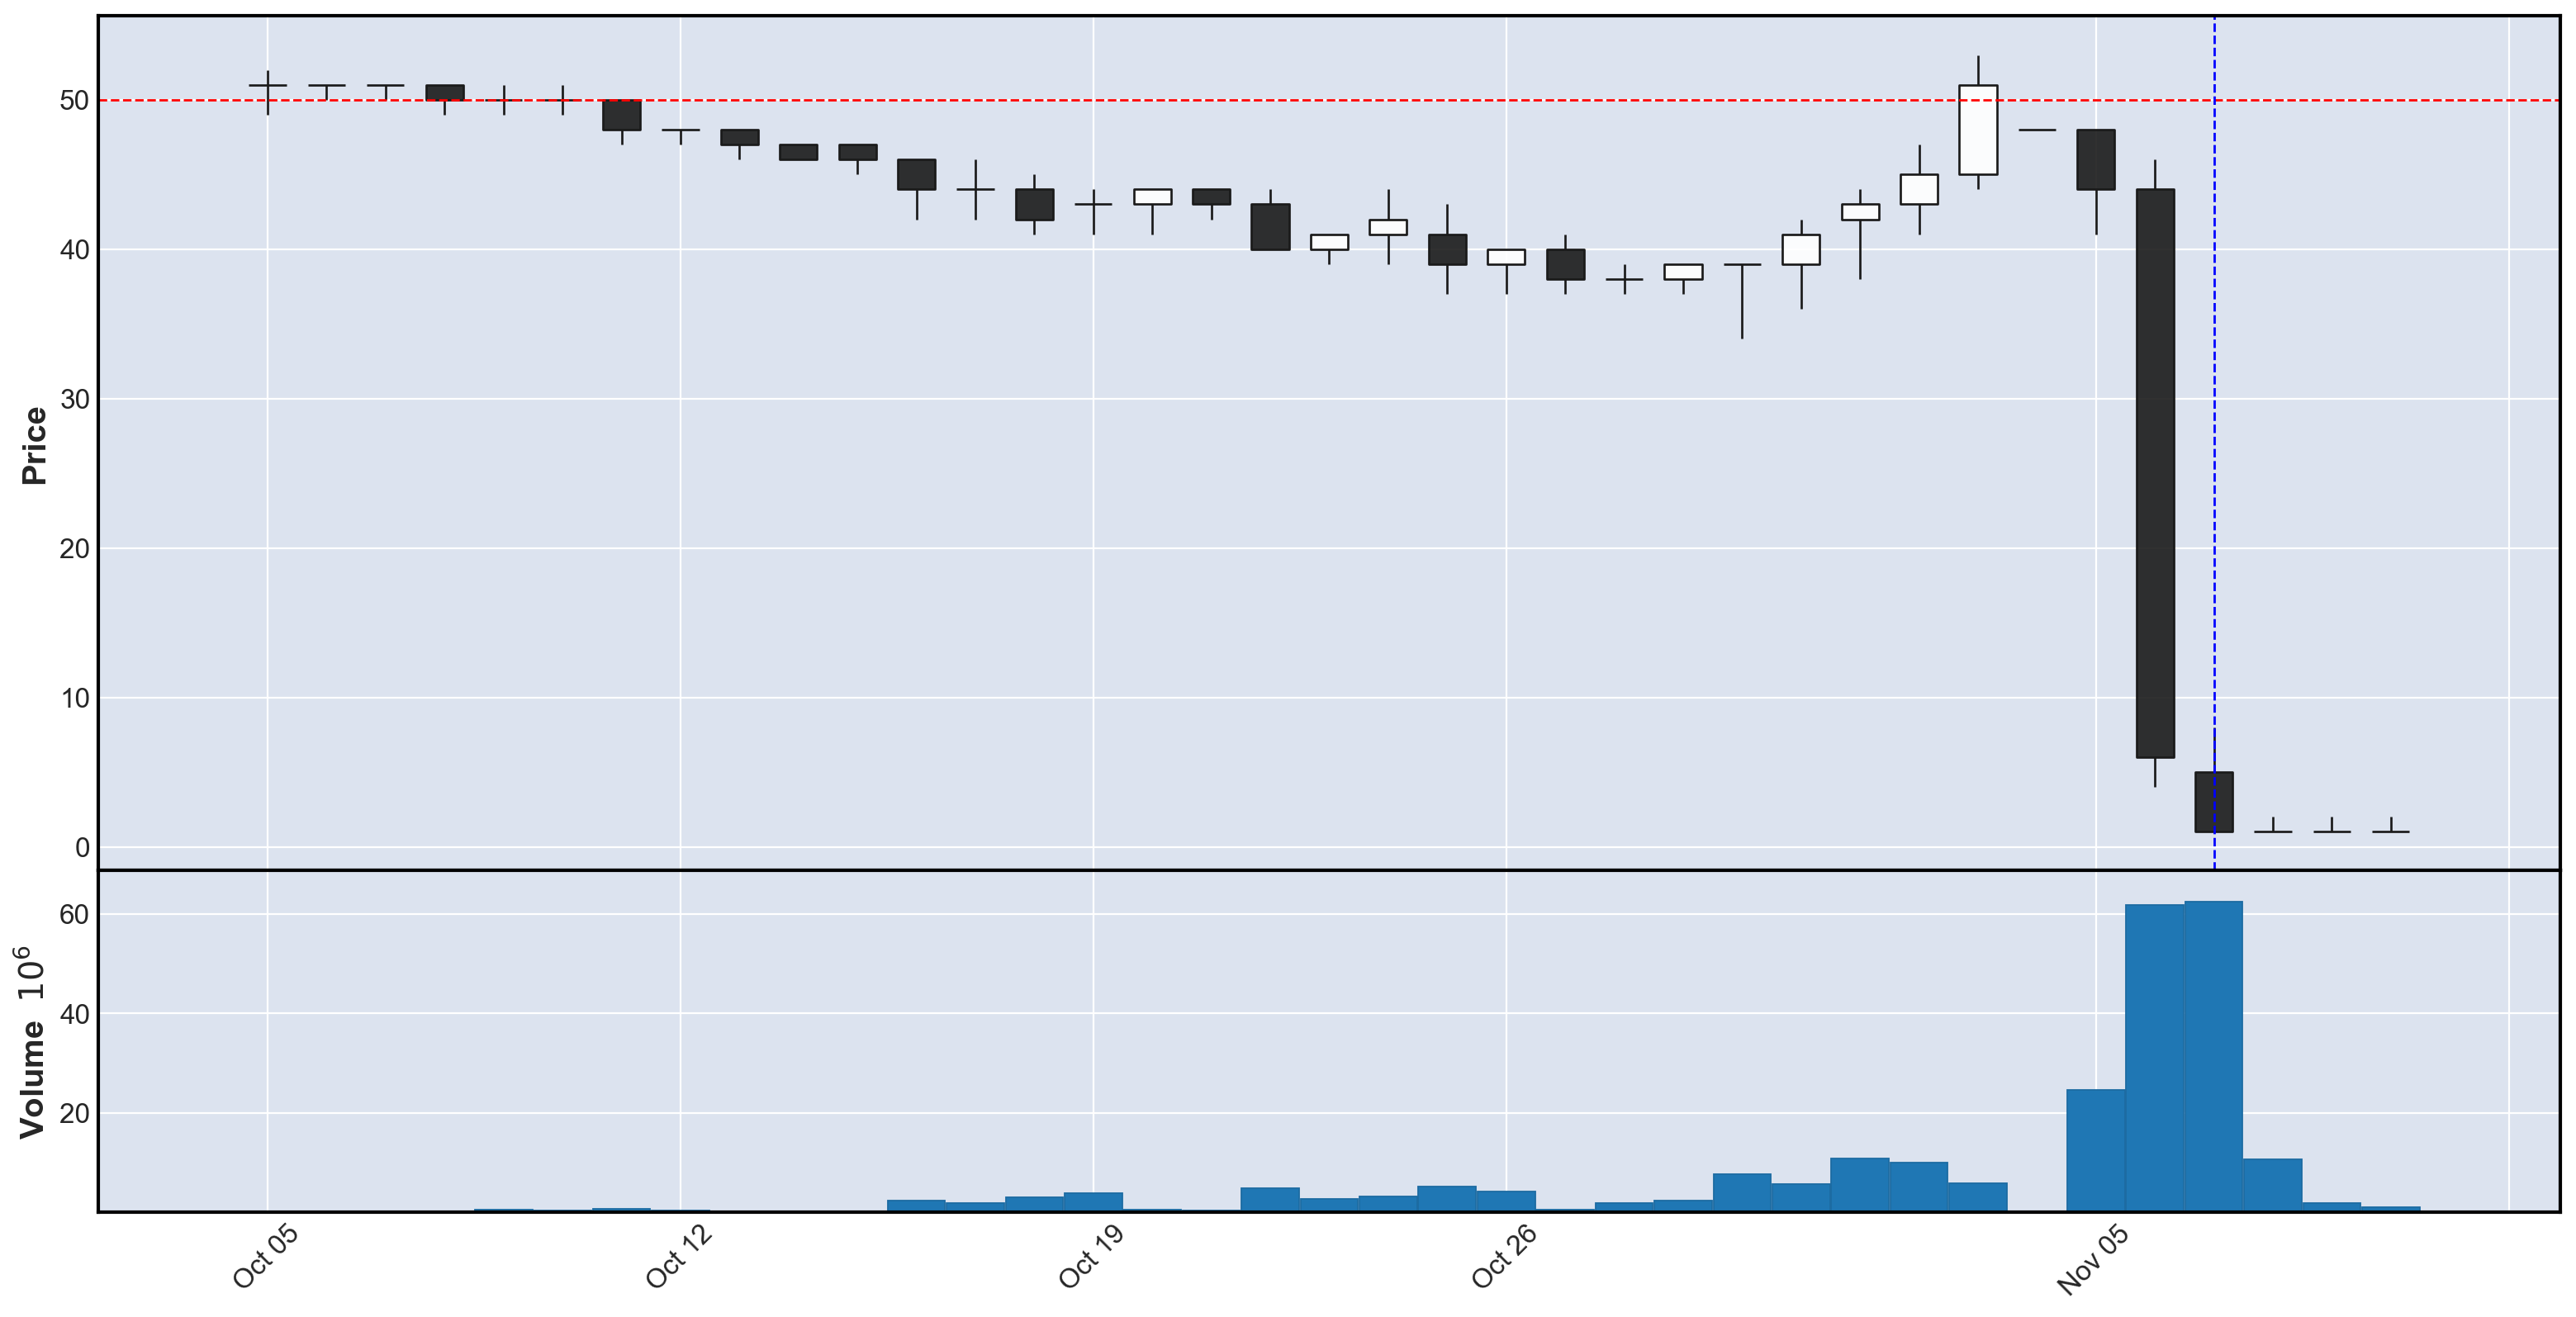

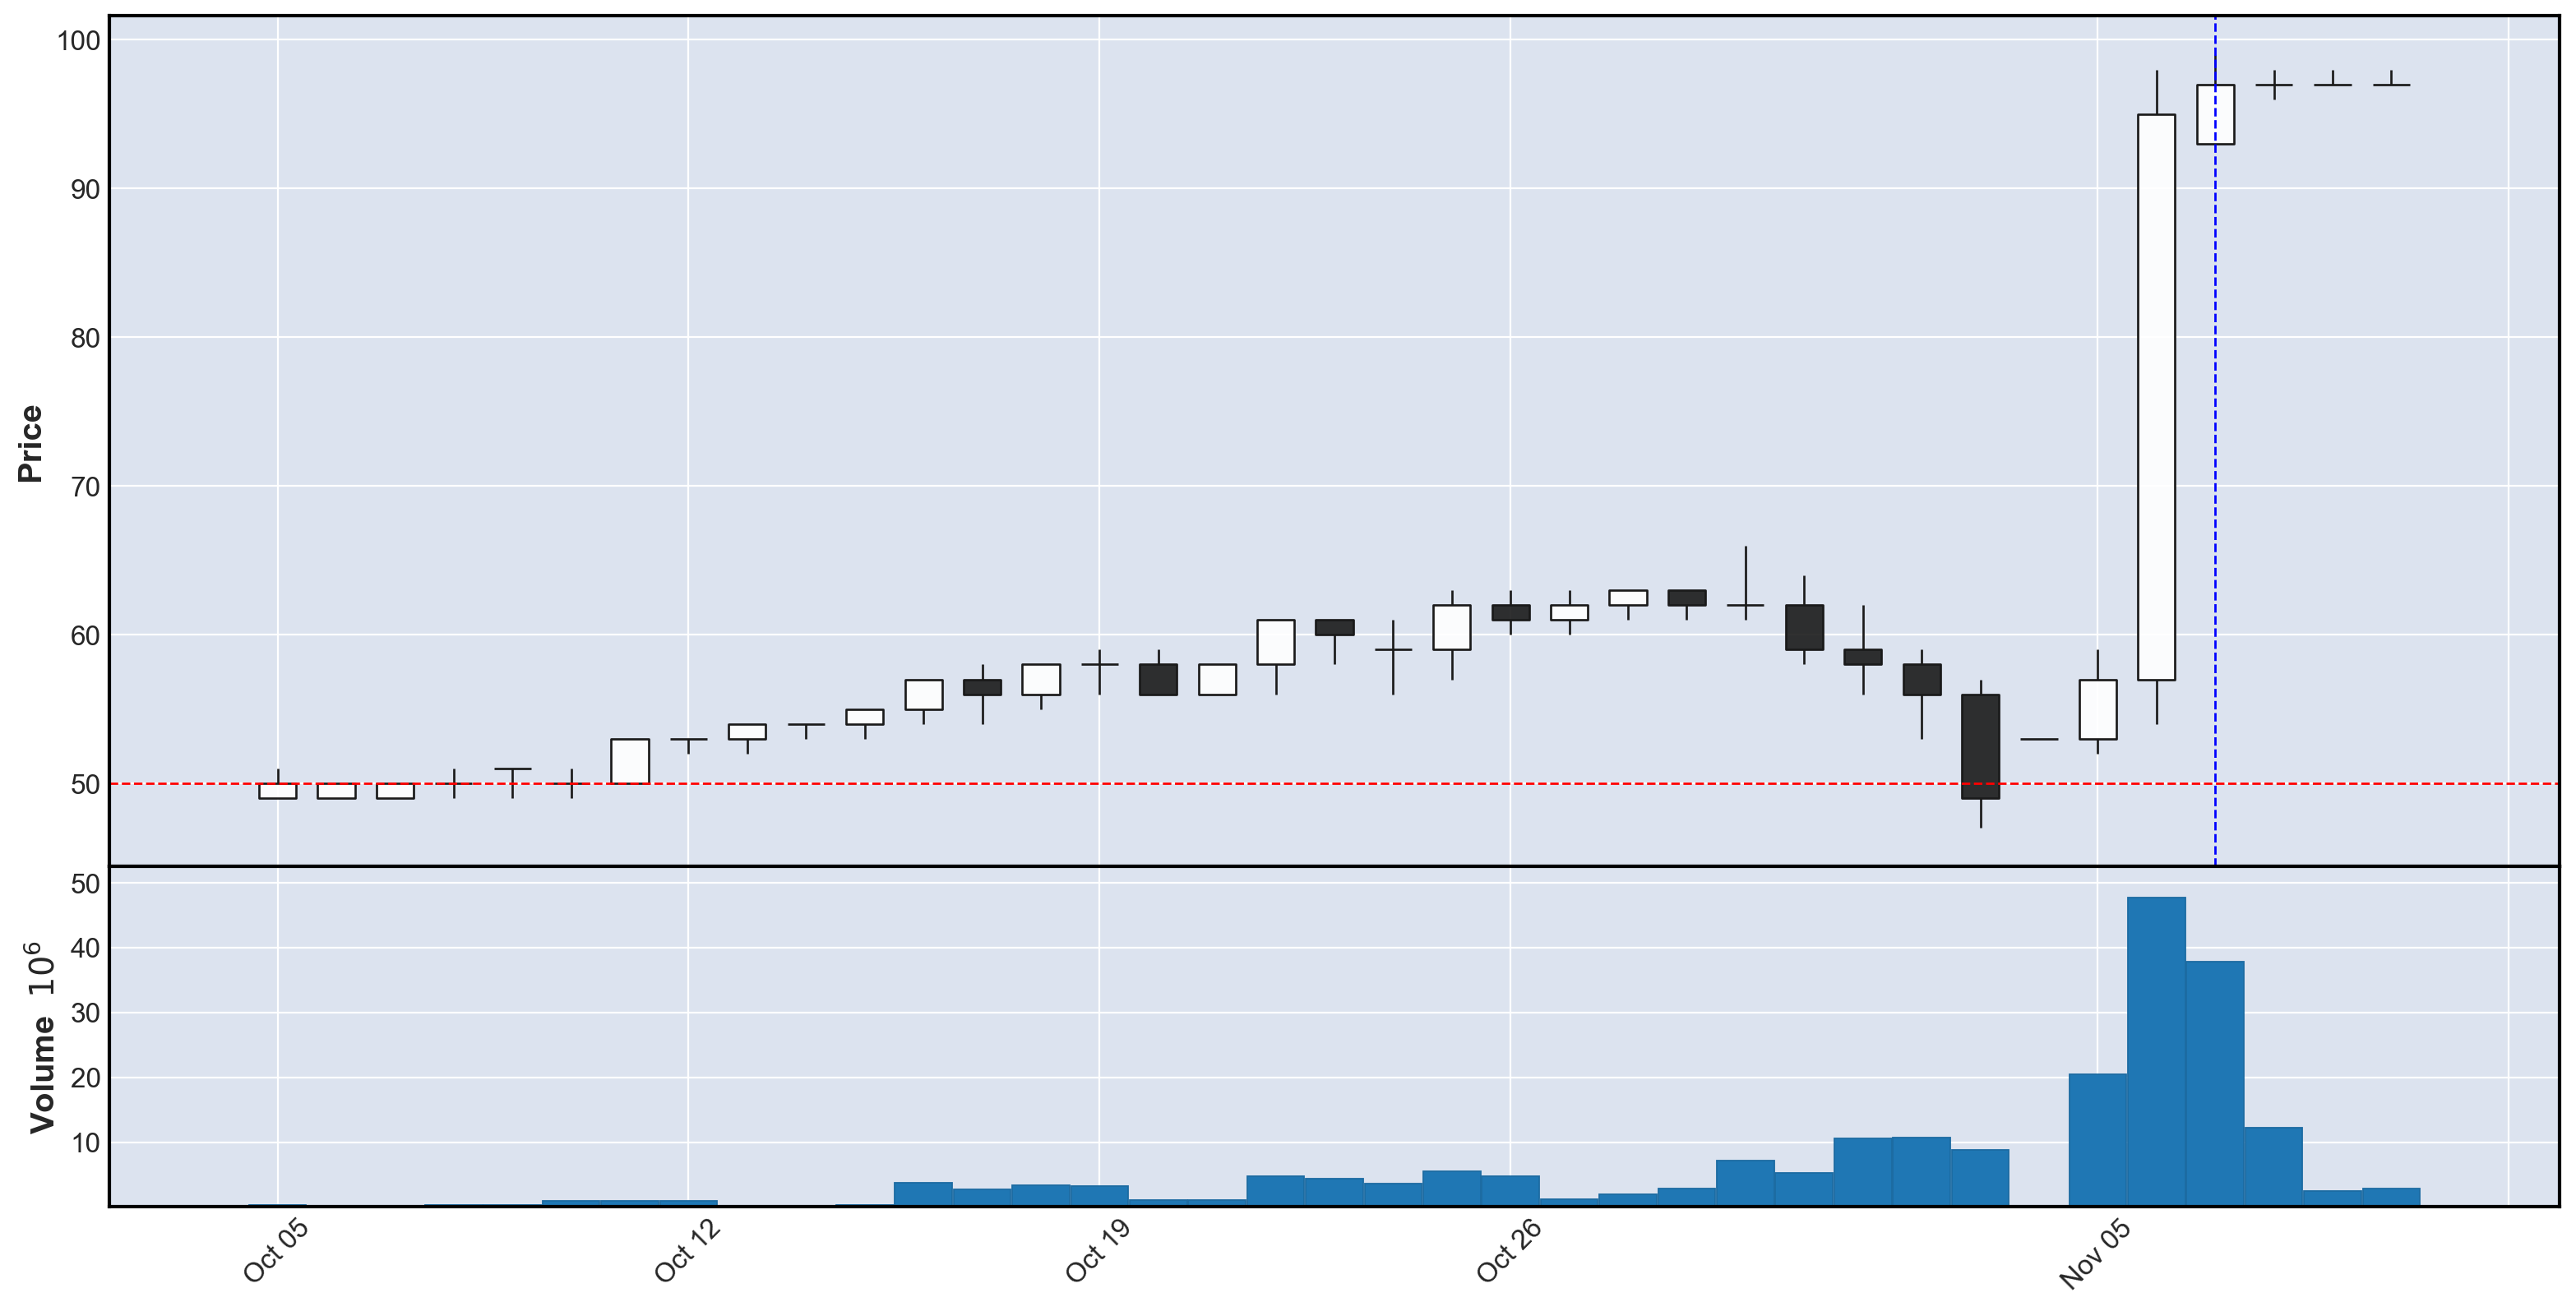

In [27]:
pres_djt_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-DJT",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)

pres_kh_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-KH",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)
djt_df = market.candlesticks_to_df(pres_djt_data)
kh_df = market.candlesticks_to_df(pres_kh_data)

djt_candlestick_df = market.build_candlestick(pres_djt_data)
kh_candlestick_df = market.build_candlestick(pres_kh_data)

fig, axes = mpf.plot(
    kh_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Set y-axis limits for the price chart (first axes object)
# axes[0].set_ylim(0, 60)  # customize as needed

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here


fig, axes = mpf.plot(
    djt_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here

In [132]:
market.get_market("KXFTAPRC-29")

{'market': {'ticker': 'KXFTAPRC-29',
  'event_ticker': 'KXFTAPRC-29',
  'market_type': 'binary',
  'title': 'Will Trump make a new free trade agreement with China before Jan 20, 2029?',
  'subtitle': '',
  'yes_sub_title': 'Before 2029',
  'no_sub_title': 'Before 2029',
  'open_time': '2025-01-10T15:00:00Z',
  'close_time': '2029-01-20T15:00:00Z',
  'expected_expiration_time': '2029-01-20T15:00:00Z',
  'expiration_time': '2029-01-20T15:00:00Z',
  'latest_expiration_time': '2029-01-20T15:00:00Z',
  'settlement_timer_seconds': 1800,
  'status': 'active',
  'response_price_units': 'usd_cent',
  'notional_value': 100,
  'tick_size': 1,
  'yes_bid': 33,
  'yes_ask': 64,
  'no_bid': 36,
  'no_ask': 67,
  'last_price': 32,
  'previous_yes_bid': 34,
  'previous_yes_ask': 56,
  'previous_price': 57,
  'volume': 6518,
  'volume_24h': 943,
  'liquidity': 13431963,
  'open_interest': 5857,
  'result': '',
  'can_close_early': True,
  'expiration_value': '',
  'category': '',
  'risk_limit_cents': 

In [152]:
market.get_markets(limit=10, status='open')

{'markets': [{'ticker': 'KXTARIFFRATEPRC-25MAY31-T87.5',
   'event_ticker': 'KXTARIFFRATEPRC-25MAY31',
   'market_type': 'binary',
   'title': 'What will the U.S. tariff rate on China be on May 31, 2025?',
   'subtitle': '',
   'yes_sub_title': '75% to 99.99%',
   'no_sub_title': '75% to 99.99%',
   'open_time': '2025-05-08T22:00:00Z',
   'close_time': '2025-05-31T03:59:00Z',
   'expected_expiration_time': '2025-05-31T14:00:00Z',
   'expiration_time': '2025-06-07T14:00:00Z',
   'latest_expiration_time': '2025-06-07T14:00:00Z',
   'settlement_timer_seconds': 1800,
   'status': 'active',
   'response_price_units': 'usd_cent',
   'notional_value': 100,
   'tick_size': 1,
   'yes_bid': 0,
   'yes_ask': 0,
   'no_bid': 100,
   'no_ask': 100,
   'last_price': 0,
   'previous_yes_bid': 0,
   'previous_yes_ask': 0,
   'previous_price': 0,
   'volume': 0,
   'volume_24h': 0,
   'liquidity': 0,
   'open_interest': 0,
   'result': '',
   'can_close_early': True,
   'expiration_value': '',
   'cat

In [153]:
events.event_info("KXTARIFFRATEPRC-25MAY31")['markets']

,market_ticker,yes_sub_title,range,strike_type,last_price,yes_bid,yes_ask,no_bid,no_ask,volume,open_time,close_time,status,rules_primary
0,KXTARIFFRATEPRC-25MAY31-T25.0,49.99% or below,– 50,less,0,0,0,100,100,0,2025-05-08T22:00:00Z,2025-05-31T03:59:00Z,active,If the US tariff rate on China is 49.99% or be...
1,KXTARIFFRATEPRC-25MAY31-T62.5,50% to 74.99%,50 – 74.99,between,0,0,0,100,100,0,2025-05-08T22:00:00Z,2025-05-31T03:59:00Z,active,If the US tariff rate on China is 50.00% to 74...
2,KXTARIFFRATEPRC-25MAY31-T87.5,75% to 99.99%,75 – 99.99,between,0,0,0,100,100,0,2025-05-08T22:00:00Z,2025-05-31T03:59:00Z,active,If the US tariff rate on China is 75.00% to 99...
3,KXTARIFFRATEPRC-25MAY31-T112.5,100% to 124.99%,100 – 124.99,between,0,0,0,100,100,0,2025-05-08T22:00:00Z,2025-05-31T03:59:00Z,active,If the US tariff rate on China is 100.00% to 1...
4,KXTARIFFRATEPRC-25MAY31-T137.5,125% to 149.99%,125 – 149.99,between,0,0,0,100,100,0,2025-05-08T22:00:00Z,2025-05-31T03:59:00Z,active,If the US tariff rate on China is 125.00% to 1...
5,KXTARIFFRATEPRC-25MAY31-T75.0,150% or above,149.99 –,greater,0,0,0,100,100,0,2025-05-08T22:00:00Z,2025-05-31T03:59:00Z,active,If the US tariff rate on China is 150.00% or a...


In [124]:
orderbook = market.get_market_orderbook(ticker="KXFTAPRC-29")["orderbook"]

# NO-side: people bidding to buy NO → these are willing to SELL YES at 100 - price
yes_asks = sorted(orderbook["no"], key=lambda x: x[0])  # sort low→high on NO bids

# YES-side: people bidding to buy YES → use as-is
yes_bids = sorted(orderbook["yes"], key=lambda x: -x[0])

print("Asks:")
for price, qty in yes_asks:
    print(f"  Buy YES @ {100 - price}¢ × {qty} contracts")

print("\nBids:")
for price, qty in yes_bids:
    print(f"  Sell YES @ {price}¢ × {qty} contracts")

Asks:
  Buy YES @ 99¢ × 54498 contracts
  Buy YES @ 98¢ × 3000 contracts
  Buy YES @ 97¢ × 10599 contracts
  Buy YES @ 96¢ × 2222 contracts
  Buy YES @ 95¢ × 40 contracts
  Buy YES @ 91¢ × 100 contracts
  Buy YES @ 87¢ × 86 contracts
  Buy YES @ 86¢ × 74 contracts
  Buy YES @ 85¢ × 64 contracts
  Buy YES @ 84¢ × 47 contracts
  Buy YES @ 83¢ × 26 contracts
  Buy YES @ 82¢ × 22 contracts
  Buy YES @ 75¢ × 10 contracts
  Buy YES @ 65¢ × 5 contracts

Bids:
  Sell YES @ 33¢ × 35 contracts
  Sell YES @ 32¢ × 500 contracts
  Sell YES @ 31¢ × 50 contracts
  Sell YES @ 29¢ × 1000 contracts
  Sell YES @ 28¢ × 484 contracts
  Sell YES @ 20¢ × 28 contracts
  Sell YES @ 9¢ × 100 contracts
  Sell YES @ 3¢ × 100 contracts
  Sell YES @ 2¢ × 2999 contracts
  Sell YES @ 1¢ × 60598 contracts


In [83]:
ask_prices = [p for p, _ in yes_asks]
ask_sizes = [q for _, q in yes_asks]
ask_cum = list(np.cumsum(ask_sizes))

bid_prices = [p for p, _ in yes_bids]
bid_sizes = [q for _, q in yes_bids]
bid_cum = list(np.cumsum(bid_sizes))



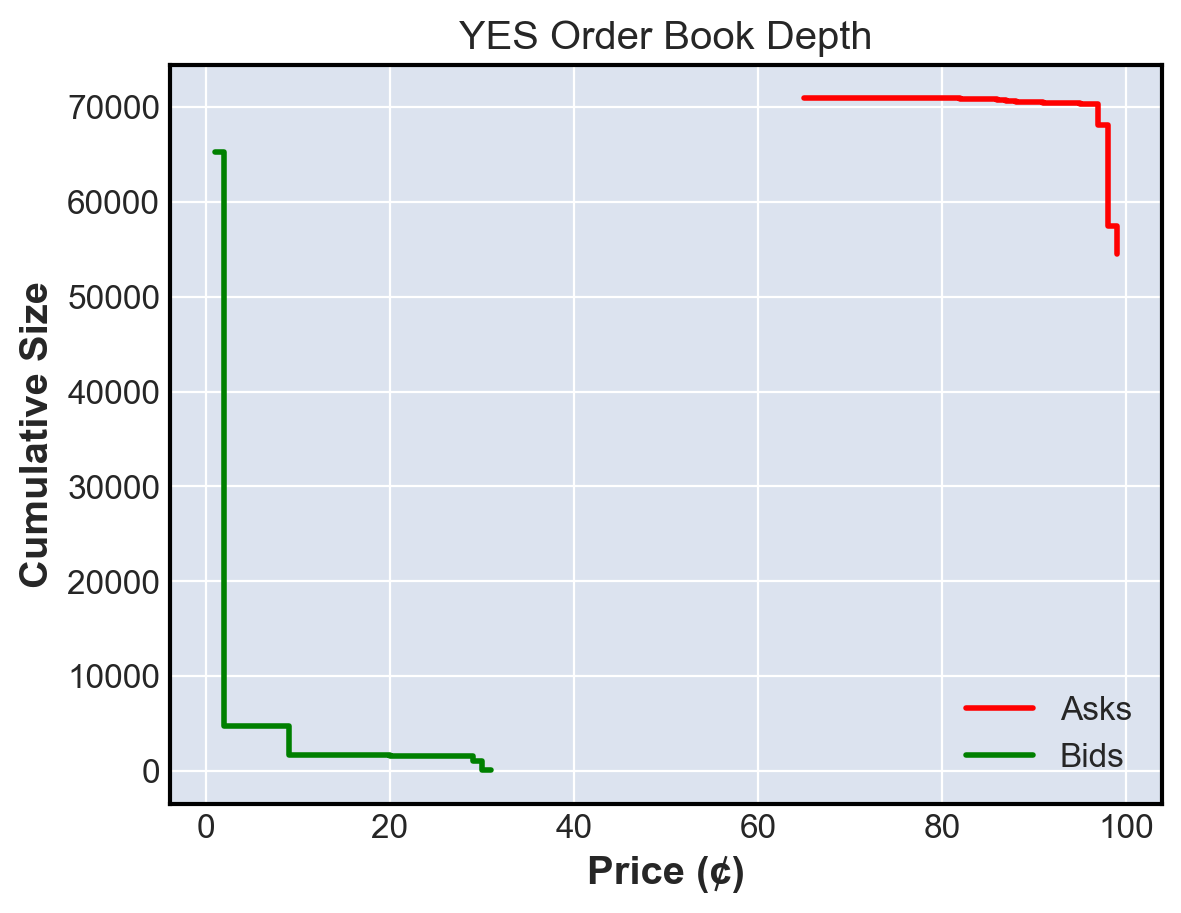

In [84]:
plt.step(ask_prices, ask_cum, label="Asks", color="red")
plt.step(bid_prices, bid_cum, label="Bids", color="green")
plt.xlabel("Price (¢)")
plt.ylabel("Cumulative Size")
plt.title("YES Order Book Depth")
plt.legend()
plt.grid(True)
plt.show()
